In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as sk
import math

# df = pd.read_csv('ks-projects-201612.csv')

In [4]:
df2018 = pd.read_csv('ks-projects-201801.csv')
df2018.drop(['ID', 'name', 'usd_pledged_real', 'usd_goal_real', 'backers', 'category'], axis=1, inplace=True)
print df2018.shape

(378661, 9)


In [5]:
label_column = 'state'
time_column = 'time_elapsed'

df2018['launched'] = pd.to_datetime(df2018['launched'])
df2018['deadline'] = pd.to_datetime(df2018['deadline'])
df2018[time_column] = (df2018.deadline - df2018.launched).astype('timedelta64[h]')
# print df2018['launched'].head(10)
# print(df2018[time_column].head(15))

df2018.drop(['launched', 'deadline'], axis=1, inplace=True)

df2018 = df2018.apply(lambda x: pd.factorize(x)[0])

print df2018.head()

   main_category  currency  goal  pledged  state  country  usd pledged  \
0              0         0     0        0      0        0            0   
1              1         1     1        1      0        1            1   
2              1         1     2        2      0        1            2   
3              2         1     3        3      0        1            3   
4              1         1     4        4      1        1            4   

   time_elapsed  
0             0  
1             1  
2             2  
3             3  
4             4  


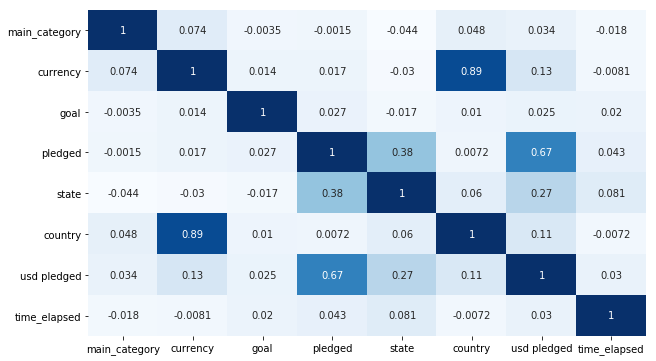

In [6]:
corr = df2018.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cbar=None, annot=True, cmap='Blues')
# sns.pairplot(df2018, hue=label_column)
plt.show()

In [11]:
X = np.array(df2018.drop([label_column], axis=1))
# y = df2018[label_column].shift(-shift_param)
y = df2018[label_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89, shuffle=True)

print "Starting..."

# clf = LinearRegression()
clf = sk.LogisticRegression()
clf.fit(X_train, y_train)

print "Finished!"

print clf.score(X_test, y_test)

Starting...
Finished!
0.664360318487


In [12]:
print len(X)

378661


In [14]:
# X = preprocessing.scale(X)

shift_param = int(math.ceil(len(X)*0.1))
X_predict = X[~shift_param:]
y_predict = y[~shift_param:]
X = X[:~shift_param+1]
y = y[:~shift_param+1]

#Again slicing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89, shuffle=True)
clf.fit(X_train, y_train)

print clf.score(X_test, y_test)

0.665796153113


In [15]:
print len(X)

340794


In [17]:
y_predictions = clf.predict(X_predict)

print clf.score(X_predict, y_predict)

0.677590577797
